## Importación de librerías y datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from dateutil.parser import parse
import re
from datetime import datetime

In [3]:
df_aviones = pd.read_csv('datasets/AccidentesAviones.csv')

In [4]:
df_aviones.head(10)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
5,5,"October 17, 1913",1030,"Near Johannisthal, Germany",Military - German Navy,?,?,Zeppelin L-2 (airship),?,?,28,?,?,28,?,?,0,Hydrogen gas which was being vented was sucked...
6,6,"March 05, 1915",0100,"Tienen, Belgium",Military - German Navy,?,?,Zeppelin L-8 (airship),?,?,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
7,7,"September 03, 1915",1520,"Off Cuxhaven, Germany",Military - German Navy,?,?,Zeppelin L-10 (airship),?,?,19,?,?,19,?,?,0,"Exploded and burned near Neuwerk Island, when..."
8,8,"July 28, 1916",?,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),?,?,20,?,?,20,?,?,0,"Crashed near the Black Sea, cause unknown."
9,9,"September 24, 1916",0100,"Billericay, England",Military - German Navy,?,?,Zeppelin L-32 (airship),?,?,22,?,?,22,?,?,0,Shot down by British aircraft crashing in flames.


## Exploración y limpieza de datos

In [5]:
df_aviones.shape

(5008, 18)

In [6]:
df_aviones.columns

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [7]:
#Eliminar la columna 'Unnamed: 0', no aporta información relevante
df_aviones=df_aviones.drop('Unnamed: 0', axis=1)

Pasar a formato minúscula todas las columnas

In [8]:
df_aviones.columns = df_aviones.columns.str.lower()

In [9]:
df_aviones.columns

Index(['fecha', 'hora declarada', 'ruta', 'operador', 'flight_no', 'route',
       'ac_type', 'registration', 'cn_ln', 'all_aboard', 'pasajeros a bordo',
       'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities',
       'crew_fatalities', 'ground', 'summary'],
      dtype='object')

Renombrar a las columnas previo análisis

In [10]:
df_aviones = df_aviones.rename(columns={'ruta': 'lugar_impacto', 'flight_no': 'numero_de_vuelo', 'route':'ruta', 'ac_type':'aeronave',
                                         'registration':'registro', 'cn_ln':'serie_o_fuselaje', 'all_aboard':'personas_a_bordo',
                                           'pasajeros a bordo':'pasajeros','crew_aboard':'tripulacion','cantidad de fallecidos':'cantidad_fallecidos',
                                           'passenger_fatalities':'pasajeros_fallecidos','crew_fatalities':'tripulacion_fallecida',
                                           'ground':'personas_no_a_bordo_fallecidas','summary':'resumen','hora declarada':'hora_declarada'})

In [11]:
df_aviones.columns

Index(['fecha', 'hora_declarada', 'lugar_impacto', 'operador',
       'numero_de_vuelo', 'ruta', 'aeronave', 'registro', 'serie_o_fuselaje',
       'personas_a_bordo', 'pasajeros', 'tripulacion', 'cantidad_fallecidos',
       'pasajeros_fallecidos', 'tripulacion_fallecida',
       'personas_no_a_bordo_fallecidas', 'resumen'],
      dtype='object')

In [12]:
#Observar el dataframe
df_aviones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   fecha                           5008 non-null   object
 1   hora_declarada                  5008 non-null   object
 2   lugar_impacto                   5008 non-null   object
 3   operador                        5008 non-null   object
 4   numero_de_vuelo                 5008 non-null   object
 5   ruta                            5008 non-null   object
 6   aeronave                        5008 non-null   object
 7   registro                        5008 non-null   object
 8   serie_o_fuselaje                5008 non-null   object
 9   personas_a_bordo                5008 non-null   object
 10  pasajeros                       5008 non-null   object
 11  tripulacion                     5008 non-null   object
 12  cantidad_fallecidos             5008 non-null   

In [13]:
#Observar nulos
df_aviones.isnull().sum()

fecha                             0
hora_declarada                    0
lugar_impacto                     0
operador                          0
numero_de_vuelo                   0
ruta                              0
aeronave                          0
registro                          0
serie_o_fuselaje                  0
personas_a_bordo                  0
pasajeros                         0
tripulacion                       0
cantidad_fallecidos               0
pasajeros_fallecidos              0
tripulacion_fallecida             0
personas_no_a_bordo_fallecidas    0
resumen                           0
dtype: int64

In [14]:
#Observar duplicados
df_aviones.duplicated().sum()

0

Luego de observar la data, vemos que posee un caracter frecuente, el cual es '?'; analizar su grado de participación y tomar desiciones


In [15]:
#Cantidad de '?' en todas las columnas
count = df_aviones.apply(lambda x: x.value_counts().get('?', 0)).sum()
count

7953

In [16]:
# contar las apariciones del elemento '?' en cada columna del DataFrame y generar
# un nuevo dataframe llamado 'df' para visualiar mejor
elemento = '?'
counts_por_columna = {}

for columna in df_aviones.columns:
    counts = df_aviones[columna].value_counts()
    counts_por_columna[columna] = counts.get(elemento, 0)


data = {'columna':list(counts_por_columna.keys()), 'cant_?' : list(counts_por_columna.values())}
df =pd.DataFrame(data)
df

,columna,cant_?
0,fecha,0
1,hora_declarada,1504
2,lugar_impacto,5
3,operador,10
4,numero_de_vuelo,3682
5,ruta,762
6,aeronave,13
7,registro,272
8,serie_o_fuselaje,667
9,personas_a_bordo,17


In [17]:
#Adecuar al formato de 24 horas la columna 'hora_declarada'
def convert_to_24h(time_str):
    if time_str == '?':
        return time_str

    numbers = ''.join(filter(str.isdigit, time_str))
    if len(numbers) == 4:
        hour = numbers[:2]
        minute = numbers[2:]
        if int(hour) >= 24 or int(minute) >= 60:
            return time_str
        return f"{hour.zfill(2)}:{minute.zfill(2)}"

    try:
        parsed_time = datetime.strptime(time_str, '%H:%M')
        return parsed_time.strftime('%H:%M')
    except ValueError:
        return time_str

# Aplicar la función a la columna 'Hora_Declarada'
df_aviones['hora_declarada'] = df_aviones['hora_declarada'].apply(convert_to_24h)


# Imprimir el dataframe resultante
print(df_aviones['hora_declarada'])

0       17:18
1           ?
2       06:30
3           ?
4       18:30
        ...  
5003    18:35
5004    18:00
5005    08:00
5006    11:30
5007    15:00
Name: hora_declarada, Length: 5008, dtype: object


In [18]:
df_aviones

,fecha,hora_declarada,lugar_impacto,operador,numero_de_vuelo,ruta,aeronave,registro,serie_o_fuselaje,personas_a_bordo,pasajeros,tripulacion,cantidad_fallecidos,pasajeros_fallecidos,tripulacion_fallecida,personas_no_a_bordo_fallecidas,resumen
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,"March 28, 2021",18:35,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,"May 21, 2021",18:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,"June 10, 2021",08:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


In [19]:
#Observar si cambio la cantidad de elementos '?' luego de la anterior transformación
elemento = '?'
counts_por_columna = {}

for columna in df_aviones.columns:
    counts = df_aviones[columna].value_counts()
    counts_por_columna[columna] = counts.get(elemento, 0)


data = {'columna':list(counts_por_columna.keys()), 'cant_?' : list(counts_por_columna.values())}
df =pd.DataFrame(data)
df

,columna,cant_?
0,fecha,0
1,hora_declarada,1504
2,lugar_impacto,5
3,operador,10
4,numero_de_vuelo,3682
5,ruta,762
6,aeronave,13
7,registro,272
8,serie_o_fuselaje,667
9,personas_a_bordo,17


In [20]:
# Observar si aperar de la transformación anterior sigue habiendo el caracter 'c' que se obserbó estuvo
# presente a lo largo de esta columna
contains_c = df_aviones['hora_declarada'].str.contains('c', case=False)
print(df_aviones[contains_c])

                  fecha hora_declarada                     lugar_impacto  \
158  September 02, 1928         c 9:15                      Toul, France   
239   November 18, 1930        c: 2:00  Techachapi Mountains, California   

                  operador numero_de_vuelo                       ruta  \
158                  CIDNA               ?    Toul - Clermont-Ferrand   
239  Pacific Air Transport               ?  Burbank, CA - Oakland, CA   

            aeronave registro serie_o_fuselaje personas_a_bordo pasajeros  \
158  Bleriot Spad 33   F-AIEP           5/4207                5         2   
239        Boeing 40   NC5340                ?                3         0   

    tripulacion cantidad_fallecidos pasajeros_fallecidos  \
158           3                   5                    2   
239           3                   3                    0   

    tripulacion_fallecida personas_no_a_bordo_fallecidas  \
158                     3                              0   
239               

In [21]:
#Corregimos los valores aún existentes
df_aviones['hora_declarada'] = df_aviones['hora_declarada'].str.replace('c: ', '', regex=False)
df_aviones['hora_declarada'] = df_aviones['hora_declarada'].str.replace('c ', '', regex=False)

In [22]:
#Volvemos a  revisar
contains_c = df_aviones['hora_declarada'].str.contains('c', case=False)
print(df_aviones[contains_c])

Empty DataFrame
Columns: [fecha, hora_declarada, lugar_impacto, operador, numero_de_vuelo, ruta, aeronave, registro, serie_o_fuselaje, personas_a_bordo, pasajeros, tripulacion, cantidad_fallecidos, pasajeros_fallecidos, tripulacion_fallecida, personas_no_a_bordo_fallecidas, resumen]
Index: []


In [23]:
df_aviones['fecha']=pd.to_datetime(df_aviones['fecha'])

In [24]:
df_aviones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   fecha                           5008 non-null   datetime64[ns]
 1   hora_declarada                  5008 non-null   object        
 2   lugar_impacto                   5008 non-null   object        
 3   operador                        5008 non-null   object        
 4   numero_de_vuelo                 5008 non-null   object        
 5   ruta                            5008 non-null   object        
 6   aeronave                        5008 non-null   object        
 7   registro                        5008 non-null   object        
 8   serie_o_fuselaje                5008 non-null   object        
 9   personas_a_bordo                5008 non-null   object        
 10  pasajeros                       5008 non-null   object        
 11  trip

Eliminar columnas que no brindan información relevante para el análisis de tasa de mortalidad en vuelos

In [25]:
df_aviones=df_aviones.drop(['numero_de_vuelo','registro','serie_o_fuselaje','resumen'], axis=1)

Cómo el análisis de la data se basa con la certeza de exitencia de las personas en la aeronave, eliminamos todas las filas en las que no existe un valor certero en la columna 'personas_a_bordo'

In [26]:
#Verificar si pasajeros y tripulacion pueden darme informacion de las personas a bordo
filas_con_interrogante = df_aviones.loc[df_aviones['personas_a_bordo'] == '?']
df2=pd.DataFrame(filas_con_interrogante)
df2

,fecha,hora_declarada,lugar_impacto,operador,ruta,aeronave,personas_a_bordo,pasajeros,tripulacion,cantidad_fallecidos,pasajeros_fallecidos,tripulacion_fallecida,personas_no_a_bordo_fallecidas
26,1919-07-21,16:55,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,Shuttle,FD Type Dirigible,?,?,?,3,2,1,10
103,1925-09-07,?,"Toul, France",CIDNA,?,Spad 33,?,?,?,?,?,?,?
347,1934-08-10,?,"Ningbo, China",China National Aviation Corporation,?,Sikorsky S-38B,?,?,?,?,?,?,?
384,1935-08-13,?,"Hangow, China",China National Aviation Corporation,?,Sikorsky S-38B,?,?,?,?,?,?,?
451,1936-12-26,?,"Nanking, China",China National Aviation Corporation,?,Douglas DC-2,?,?,?,?,?,?,?
652,1942-10-01,?,"Kunming, China",China National Aviation Corporation,?,Douglas C-47,?,?,?,?,?,?,?
754,1944-11-09,?,"Seljord, Norway",Military - U.S. Army Air Corps,?,?,?,?,?,?,?,?,?
854,1946-03-18,?,"Between Chungking and Shanghai, China",China National Aviation Corporation,Chunking - Shanghai,?,?,?,?,?,?,?,?
1231,1951-01-20,?,"Huilyo, Peru",Military - TAM,?,Douglas DC-3,?,?,?,16,?,?,?
1362,1952-12-22,?,"Damascus, Syria",Syrian Air,?,Douglas DC-3,?,?,?,9,?,?,?


In [27]:
#En el resultado anterior observamos que no se sabe los valores de pasajeros y tripulacion cuando personas_a_bordo
# es '?' por lo que porcedemos a ignorar todos aquellos valores, ya que no hay manera de saberlos
df_aviones = df_aviones.loc[df_aviones['personas_a_bordo'] != '?']
df_aviones = df_aviones.reset_index(drop=True)

In [28]:
#realizamos una copia del dataframe con todas las transformaciones actuales
df_aviones_co=df_aviones.copy()

In [29]:
# Ahora ya que las columnas pasajeros y tripulacion no me pueden brndar mas informacion con respecto al total de 
# pasajeros a bordo, procedemos a borrarlos
df_aviones=df_aviones.drop(['pasajeros','tripulacion'],axis=1)

Observar que al eliminar las filas en donde no se conocía con certeza las personas a bordo, se fueron con ella el total de pasajeros fallecidos en donde tampoco se sabia con certeza el número, por lo que pasajeros_fallecidos y tripulacion_fallecida ya no pueden dar información relevante del total de fallecidos o de la cantidad_fallecidos, por lo que procedemos a eliminar dichas columnas

In [30]:
df_aviones=df_aviones.drop(['pasajeros_fallecidos','tripulacion_fallecida'],axis=1)

In [31]:
df_aviones.shape

(4991, 9)

In [32]:
df_aviones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   fecha                           4991 non-null   datetime64[ns]
 1   hora_declarada                  4991 non-null   object        
 2   lugar_impacto                   4991 non-null   object        
 3   operador                        4991 non-null   object        
 4   ruta                            4991 non-null   object        
 5   aeronave                        4991 non-null   object        
 6   personas_a_bordo                4991 non-null   object        
 7   cantidad_fallecidos             4991 non-null   object        
 8   personas_no_a_bordo_fallecidas  4991 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 351.1+ KB


In [33]:
elemento = '?'
counts_por_columna = {}

for columna in df_aviones.columns:
    counts = df_aviones[columna].value_counts()
    counts_por_columna[columna] = counts.get(elemento, 0)


data = {'columna':list(counts_por_columna.keys()), 'cant_?' : list(counts_por_columna.values())}
df =pd.DataFrame(data)
df

,columna,cant_?
0,fecha,0
1,hora_declarada,1488
2,lugar_impacto,5
3,operador,10
4,ruta,748
5,aeronave,11
6,personas_a_bordo,0
7,cantidad_fallecidos,0
8,personas_no_a_bordo_fallecidas,32


In [34]:
df_aviones['hora_declarada'].value_counts()

?        1488
15:00      38
17:00      34
14:00      33
11:00      32
         ... 
02:42       1
00:54       1
12:04       1
21:16       1
19:14       1
Name: hora_declarada, Length: 1067, dtype: int64

In [35]:
df_aviones['hora_declarada'].nunique()

1067

In [36]:
df_aviones['lugar_impacto'].value_counts().head(10)

Moscow, Russia            16
Manila, Philippines       15
New York, New York        14
Cairo, Egypt              13
Sao Paulo, Brazil         13
Rio de Janeiro, Brazil    12
Bogota, Colombia          12
Near Moscow, Russia       11
Tehran, Iran              10
Chicago, Illinois         10
Name: lugar_impacto, dtype: int64

In [37]:
df_aviones['lugar_impacto'].nunique()

4111

In [38]:
df_aviones.shape

(4991, 9)

In [39]:
df_aviones['operador'].value_counts()

Aeroflot                             253
Military - U.S. Air Force            141
Air France                            73
Deutsche Lufthansa                    63
United Air Lines                      44
                                    ... 
Jet Avia Charter                       1
S.A.M. Società Aerea Mediterranea      1
Atlantic City Airlines                 1
Inair Panama                           1
Kamchatka Aviation Enterprise          1
Name: operador, Length: 2262, dtype: int64

In [40]:
df_aviones['ruta'].value_counts().head(10)

?                             748
Training                       96
Sightseeing                    31
Test flight                    23
Sao Paulo - Rio de Janeiro      7
Test                            6
Rio de Janeiro - Sao Paulo      5
Demonstration                   4
Paris - London                  4
Huambo - Luanda                 4
Name: ruta, dtype: int64

In [41]:
df_aviones['ruta'].nunique()

3838

In [42]:
df_aviones[(df_aviones['lugar_impacto']=='Russia')][['lugar_impacto']]

,lugar_impacto
84,Russia


In [43]:
df_aviones['lugar_impacto']

0                      Fort Myer, Virginia
1                  Juvisy-sur-Orge, France
2                Atlantic City, New Jersey
3       Victoria, British Columbia, Canada
4                       Over the North Sea
                       ...                
4986                    Near Butte, Alaska
4987                  Near Kaduna, Nigeria
4988            Near Pyin Oo Lwin, Myanmar
4989            Patikul, Sulu, Philippines
4990                        Palana, Russia
Name: lugar_impacto, Length: 4991, dtype: object

In [44]:
df_aviones.iloc[4330]

fecha                                 2001-09-11 00:00:00
hora_declarada                                      09:03
lugar_impacto                     New York City, New York
operador                                 United Air Lines
ruta                                 Boston - Los Angeles
aeronave                                 Boeing B-767-222
personas_a_bordo                                       65
cantidad_fallecidos                                    65
personas_no_a_bordo_fallecidas                       2750
Name: 4330, dtype: object

## EDA

Analizar la incidencia de accidentes según el año, para el cual generamos una columna más al dataframe

In [45]:
df_aviones['anio']=df_aviones['fecha'].dt.year

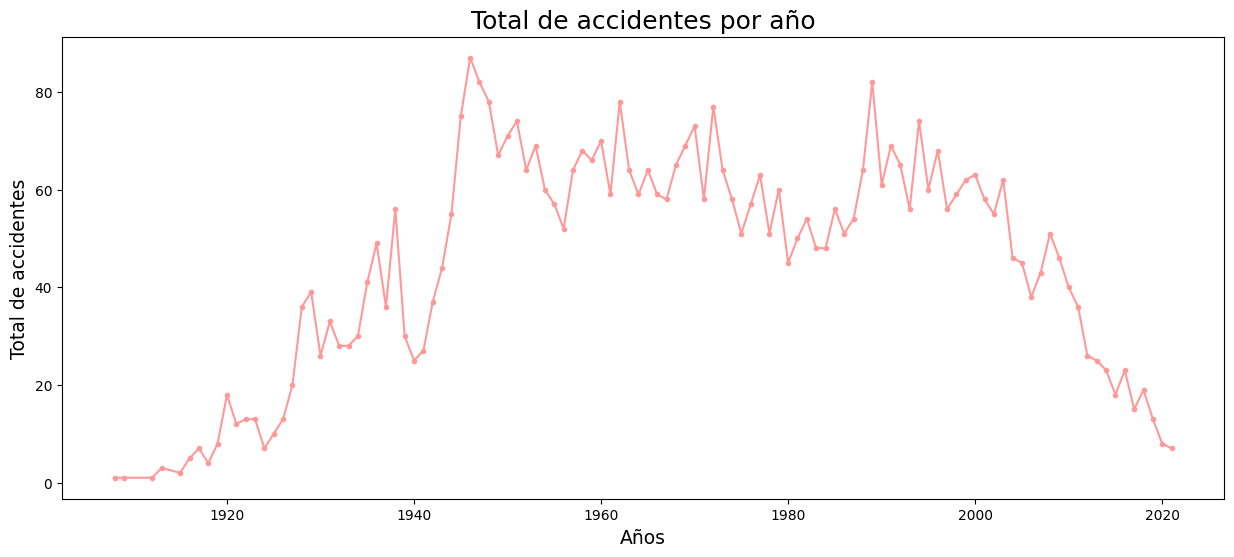

In [46]:
#Graficar total de accidentes por año
accidentes_por_anio = df_aviones.groupby(df_aviones.anio)[['anio']].count()
plt.figure(figsize= (15, 6))
color_rojo_suave = (1, 0.6, 0.6)
plt.plot(accidentes_por_anio.index, accidentes_por_anio['anio'], marker= '.', color=color_rojo_suave)
plt.xlabel('Años', fontsize=13.5)
plt.ylabel('Total de accidentes',fontsize=13.5)
plt.title('Total de accidentes por año', loc='center', fontsize=18)
plt.show()

In [47]:
df_aviones['personas_a_bordo']=df_aviones['personas_a_bordo'].astype(int)
df_aviones['cantidad_fallecidos']=df_aviones['cantidad_fallecidos'].astype(int)

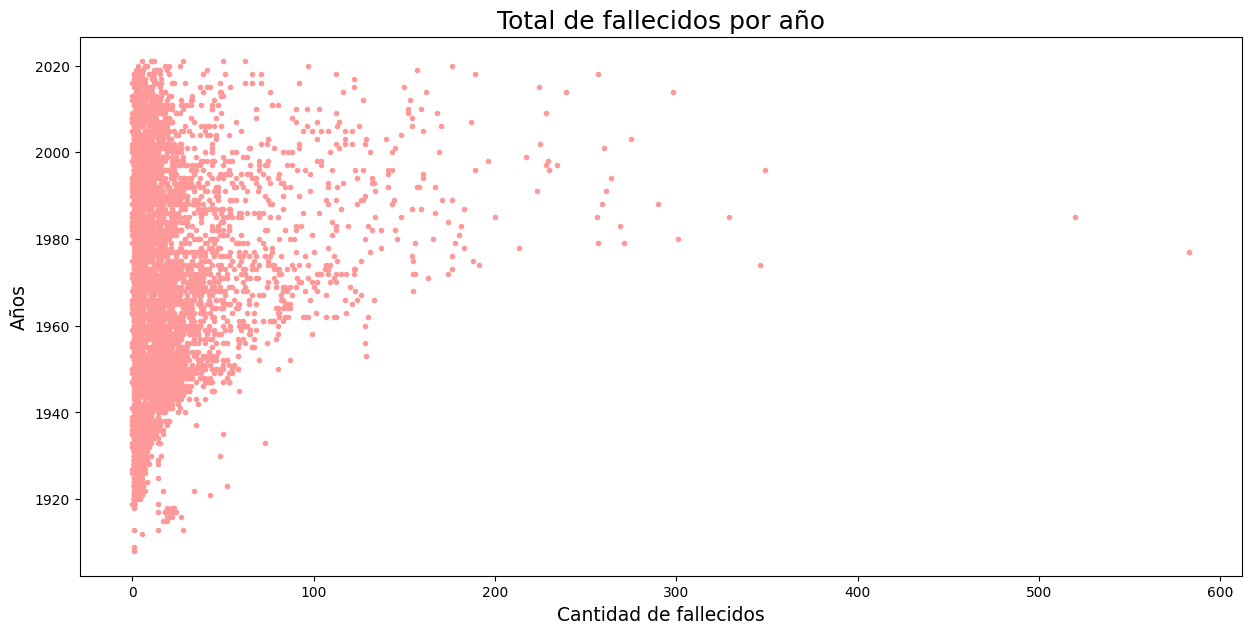

In [48]:
#Graficar total de fallecidos por año
plt.figure(figsize= (15, 7))
anios = df_aviones['anio']
fallecidos=df_aviones['cantidad_fallecidos']
color_rojo_suave = (1, 0.6, 0.6)
plt.plot(fallecidos, anios, '.',color=color_rojo_suave)
plt.xlabel('Cantidad de fallecidos',fontsize=13.5)
plt.ylabel('Años',fontsize=13.5)
plt.title('Total de fallecidos por año',fontsize=18)
plt.show()

In [49]:
df_aviones['supervivientes']=df_aviones['personas_a_bordo']-df_aviones['cantidad_fallecidos']

In [50]:
df_aviones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   fecha                           4991 non-null   datetime64[ns]
 1   hora_declarada                  4991 non-null   object        
 2   lugar_impacto                   4991 non-null   object        
 3   operador                        4991 non-null   object        
 4   ruta                            4991 non-null   object        
 5   aeronave                        4991 non-null   object        
 6   personas_a_bordo                4991 non-null   int32         
 7   cantidad_fallecidos             4991 non-null   int32         
 8   personas_no_a_bordo_fallecidas  4991 non-null   object        
 9   anio                            4991 non-null   int64         
 10  supervivientes                  4991 non-null   int32         
dtypes: d

In [51]:
df_aviones.columns

Index(['fecha', 'hora_declarada', 'lugar_impacto', 'operador', 'ruta',
       'aeronave', 'personas_a_bordo', 'cantidad_fallecidos',
       'personas_no_a_bordo_fallecidas', 'anio', 'supervivientes'],
      dtype='object')

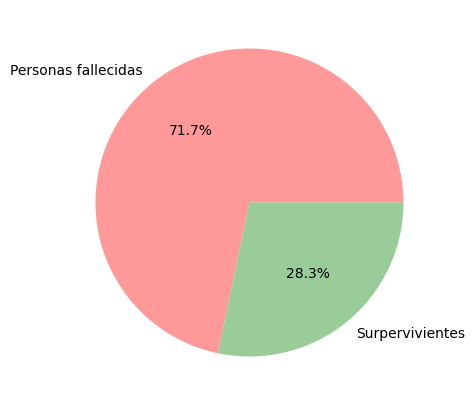

In [52]:
plt.figure(figsize=(6,5))
personas_abordo= df_aviones.personas_a_bordo.sum()
personas_abordo_fallecidas = df_aviones.cantidad_fallecidos.sum()
supervivientes = personas_abordo - personas_abordo_fallecidas

y = np.array([personas_abordo_fallecidas, supervivientes])
mylabels = ["Personas fallecidas", "Surpervivientes"]
color_verde_suave = (0.6, 0.8, 0.6)
color_rojo_suave = (1, 0.6, 0.6)
colores=[color_rojo_suave,color_verde_suave]
plt.pie(y, labels = mylabels, colors=colores, autopct='%1.1f%%')
plt.show()

In [53]:
df_aviones.columns

Index(['fecha', 'hora_declarada', 'lugar_impacto', 'operador', 'ruta',
       'aeronave', 'personas_a_bordo', 'cantidad_fallecidos',
       'personas_no_a_bordo_fallecidas', 'anio', 'supervivientes'],
      dtype='object')

In [54]:
df_aeronaves_accidentes = df_aviones.groupby('aeronave')[['cantidad_fallecidos']].sum()
df_aeronaves_accidentes = df_aeronaves_accidentes.rename(columns={'aeronave': 'cantidad_fallecidos'})
df_aeronaves_accidentes = df_aeronaves_accidentes.sort_values(by='cantidad_fallecidos', ascending=False)
df_aeronaves_accidentes_top = df_aeronaves_accidentes[df_aeronaves_accidentes['cantidad_fallecidos'] > 500]
df_aeronaves_accidentes_top

,cantidad_fallecidos
aeronave,
Douglas DC-3,4699
Douglas C-47,1059
Douglas DC-6B,1051
Antonov AN-26,1038
Ilyushin IL-18B,1008
Douglas DC-4,972
McDonnell Douglas DC-9-32,953
de Havilland Canada DHC-6 Twin Otter 300,810
Tupolev TU-134A,807


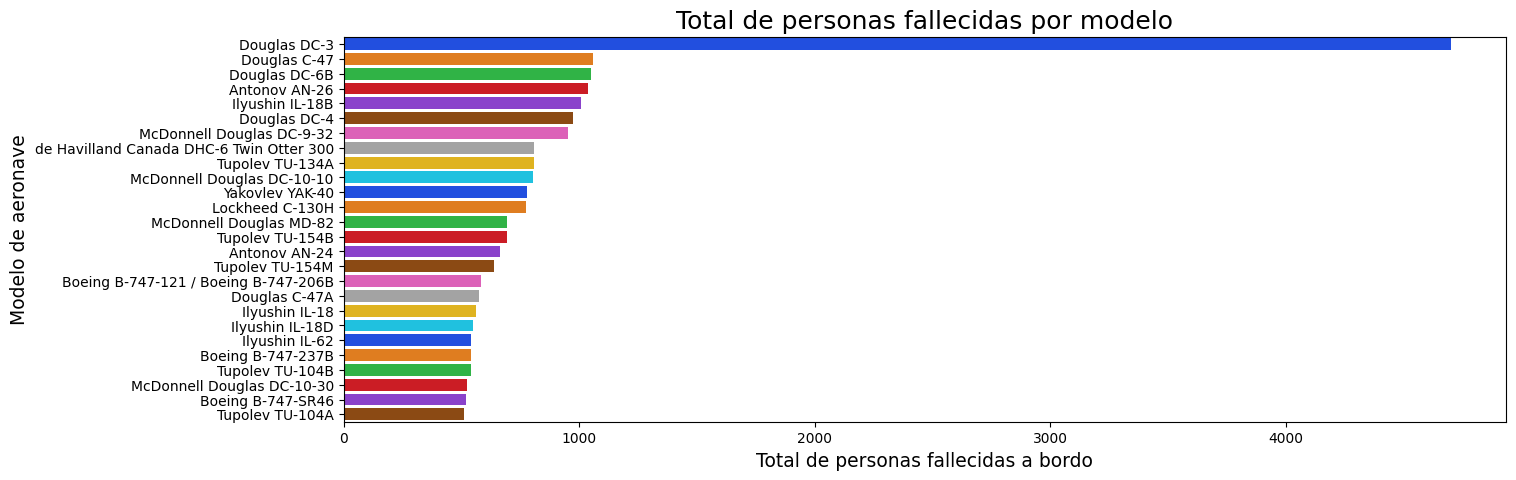

In [55]:
plt.figure(figsize=(15, 5))
sns.barplot(y=df_aeronaves_accidentes_top.index, x="cantidad_fallecidos", data=df_aeronaves_accidentes_top, palette="bright")
plt.xlabel('Total de personas fallecidas a bordo',fontsize=13.5)
plt.ylabel('Modelo de aeronave',fontsize=13.5)
plt.title('Total de personas fallecidas por modelo', fontsize=18 )
plt.show()

In [56]:
#Observar el modelo con mayor muertes por accidentes
df_aviones[(df_aviones['aeronave']=='Douglas DC-3')][['cantidad_fallecidos','anio']].sum()

cantidad_fallecidos      4699
anio                   645791
dtype: int64

In [57]:
pd.DataFrame(df_aviones).to_csv('datasets/accidentes_trans.csv', index=False)